# 5.4.1 Isotropic Model Results in the Frequency Domain

Numerical examples of the book  

### Introduction to Controlled-Source Electromagnetic Methods  
Anton Ziolkowski and Evert Slob, 2019, *Cambridge University Press*; ISBN: [9781107058620](https://www.cambridge.org/9781107058620).

- - -
Copyright 2018-2021 Dieter Werthmüller

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0). Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [1]:
import numpy as np
import empymod as epm
import matplotlib.pyplot as plt

%matplotlib inline

### Choose your preferred colour map

The book shows in the chapter black-and-white figures, and in the plate section coloured versions.

In [2]:
plt.rcParams['image.cmap'] = 'viridis'  # Colour
# plt.rcParams['image.cmap'] = 'gray'   # Black-and-white

## Calculation

### General model parameters

In [3]:
# Offsets for period-amplitude plots
x = 5e2+np.linspace(0, 1.95e4, 196)

# Periods for offset-amplitude plots
p = np.logspace(-1.5, 1.5, 401)

# Common model parameters
model = {'src': [0, 0, 1e-3],         # Source location
         'rec': [x, x*0, 1e-3],       # Receiver location
         'freqtime': 1/p,             # Frequencies
         'res': [2e14, 20, 400, 20],  # Resistivity
         'loop': 'off',               # Loop over frequencies
         'htarg': {'dlf': 'key_201_2012'},  # Use same filter as in book
         'verb': 1}                   # Verbosity

# Target at 1 km depth
ex1km = epm.dipole(depth=[0, 1000, 1040], **model)

# Target at 3 km depth
ex3km = epm.dipole(depth=[0, 3000, 3040], **model)

# Analytical, diffusive half-space solution
hs = epm.analytical(src=[0, 0, 0], rec=[x, x*0, 0], res=20,
                    freqtime=1/p, solution='dhs', verb=1)

### Plotting functions

In [4]:
def plot_result(data, error=False):
    """Create figure.
    
    Most figures in this section are very similar, and just differ in
    the shown data. We can therefore define a plot-function which
    we subsequently call with the different results.
    
    """
    n = len(data)
    
    # Define figure size depending if 2 or 4 data-sets.
    if n == 2:
        tit = 'Depth to resistor: '
        titadd = ['1 km', '3 km']
        size = (12, 6)
        clbargs = {'location': 'bottom', 'fraction': .05,
                   'pad': 0.2, 'aspect': 30}
    else:
        tit = 'Half-space response'
        titadd = ['', '']
        size = (6, 6)
        clbargs = {'location': 'bottom'}
        
    if error:
        clbticks = [-2, -1.5, -1, -0.5, 0, 0.5, 1]
        vmin = -2
        vmax = 1
    else:
        clbticks = [-13, -12, -11, -10, -9]
        vmin = -13
        vmax = -9

    # Start figure
    fig, axs = plt.subplots(figsize=size, nrows=1, ncols=n)
    if n == 2:
        axs = axs.ravel()
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
    else:
        axs = [axs,]
    
    # Loop over data
    for i, val in enumerate(data):
        plt.sca(axs[i])
        plt.title(tit + titadd[i % 2], fontweight='bold')
        
        # pcolormesh takes x/y as start and end point of pixels,
        # not midpoints. So we have to create these.
        dx = (x[1]-x[0])/2
        px = np.r_[x-dx, x[-1]+dx]
        lp = np.log10(p)
        dp = (lp[1]-lp[0])/2
        pp = 10**(np.r_[lp-dp, lp[-1]+dp])
        
        # Plot result
        cs = plt.pcolormesh(px/1000, pp, np.log10(np.abs(val)),
                            vmin=vmin, vmax=vmax)
        
        # Plot contours
        level_factor = 2
        if (vmax-vmin) < 4:
            level_factor *= 2
        levels = np.linspace(vmin, vmax, level_factor*(vmax-vmin)+1)
        cs2 = plt.contour(x/1000, p, np.log10(np.abs(val)),
                          levels=levels,
                          linewidths=0.5, colors=[(0, 0, 0, 0.5)])
        
        plt.xticks([5, 10, 15, 20])
        plt.xlabel('Offset (km)')
        plt.ylabel(r'$\log_{10}$(period) (s)')
        axs[i].set_yscale('log')
        axs[i].invert_yaxis()
        plt.ylim([np.max(p), np.min(p)])
        plt.yticks([1e-1, 1e0, 1e1], ('-1', '0', '1'))

    # Plot colorbar
    cax, kw = plt.matplotlib.colorbar.make_axes(axs, **clbargs)
    cb = plt.colorbar(cs, cax=cax, ticks=clbticks, **kw)

    plt.show()


def set_axis(ytype, p=False):
    """General settings for line plots."""
    if np.any(p):
        plt.xlabel('Period (s)')
        if ytype == 1:
            plt.ylabel('Electric field (pV/m)')
        else:
            plt.ylabel('Phase (rad)')
        plt.xlim([np.min(p), np.max(p)])
    else:
        plt.xlabel('Offset (km)')
        if ytype == 1:
            plt.ylabel('Electric field (V/m)')
        else:
            plt.ylabel('Phase (rad)')
        plt.xlim([0, 20])
        plt.xticks([0, 5, 10, 15, 20])
    plt.legend()
    
    
def thin_y_ticks():
    """Hide every second y-tick label."""
    for label in plt.gca().get_yticklabels()[::2]:
        label.set_visible(False)

## Figure 5.41

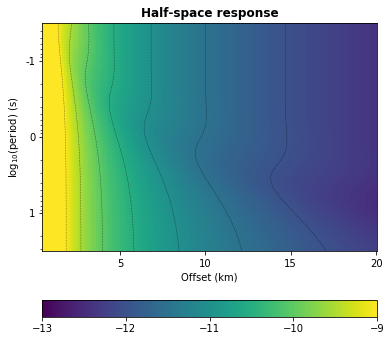

In [5]:
plot_result([hs])

Figure 5.41 Electric field amplitude for the half-space land model as a function of offset and source oscillation period. The colour bar indicates the values of the logarithm of the amplitude.

## Figure 5.42

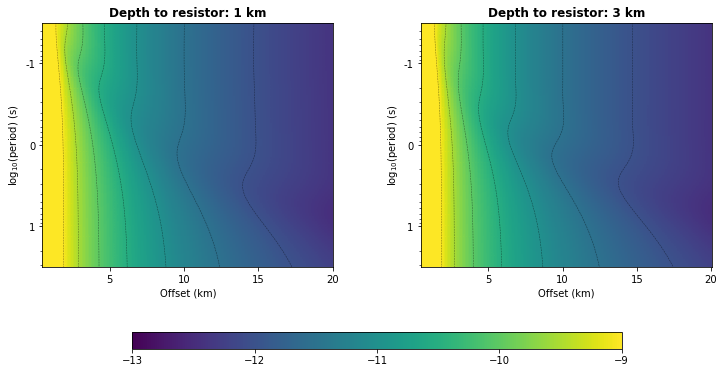

In [6]:
plot_result([ex1km, ex3km])

Figure 5.42 Electric field amplitudes for the land model with a buried resistive layer at 1 km depth (left) and at 3 km depth (right) as a function of offset and source oscillation period. The colour bar indicates the amplitudes on a logarithmic scale.

## Figure 5.43

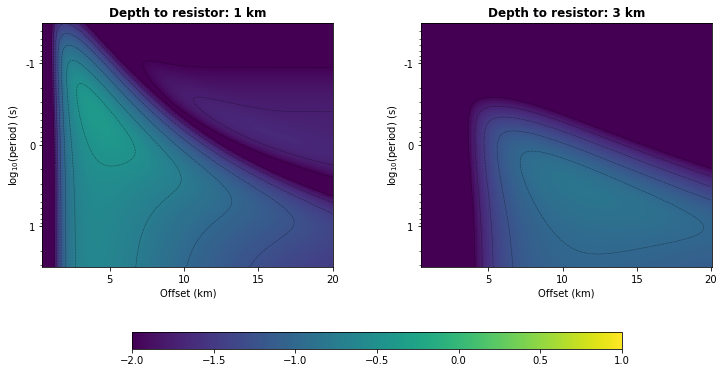

In [7]:
plot_result([(ex1km-hs)/hs, (ex3km-hs)/hs], True)

Figure 5.43 Normalised amplitude of the difference in the electric fields for the land model with a buried resistive layer at 1 km depth (left) and at 3 km depth (right) as a function of offset and source oscillation period. The colour bar indicates the amplitude of the normalised difference in the electric field on a logarithmic scale.

## Figure 5.44

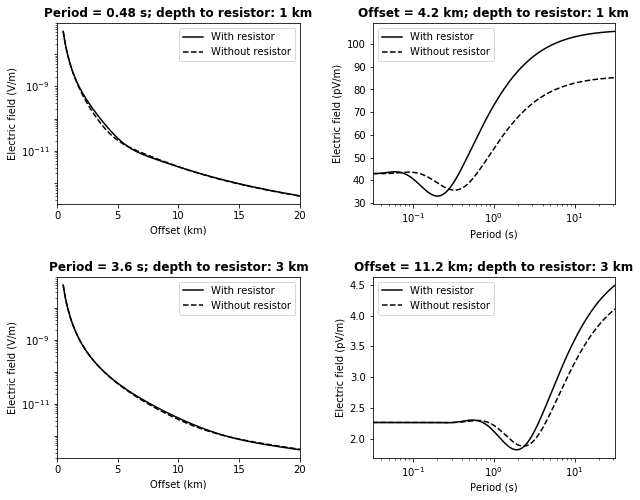

In [8]:
# Define indices
nx1, nx3 = 37, 107
np1, np3 = 158, 274

plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.4)

# 1st subplot
plt.subplot(221)
plt.title('Period = '+str(np.round(p[np1], 2))+' s; depth to resistor: 1 km',
          fontweight='bold')
plt.semilogy(x/1000, np.abs(ex1km[np1, :]), 'k-', label='With resistor')
plt.semilogy(x/1000, np.abs(hs[np1, :]), 'k--', label='Without resistor')
set_axis(1)
thin_y_ticks()

# 2nd subplot
plt.subplot(223)
plt.title('Period = '+str(np.round(p[np3], 1))+' s; depth to resistor: 3 km',
          fontweight='bold')
plt.semilogy(x/1000, np.abs(ex3km[np3, :]), 'k-', label='With resistor')
plt.semilogy(x/1000, np.abs(hs[np3, :]), 'k--', label='Without resistor')
set_axis(1)
thin_y_ticks()

# 3rd subplot
plt.subplot(222)
plt.title('Offset = '+str(np.round(x[nx1])/1000) +
          ' km; depth to resistor: 1 km', fontweight='bold')
plt.semilogx(p, np.abs(ex1km[:, nx1])/1e-12, 'k-', label='With resistor')
plt.semilogx(p, np.abs(hs[:, nx1])/1e-12, 'k--', label='Without resistor')
set_axis(1, p)

# 4th subplot
plt.subplot(224)
plt.title('Offset = '+str(np.round(x[nx3])/1000) +
          ' km; depth to resistor: 3 km', fontweight='bold')
plt.semilogx(p, np.abs(ex3km[:, nx3])/1e-12, 'k-', label='With resistor')
plt.semilogx(p, np.abs(hs[:, nx3])/1e-12, 'k--', label='Without resistor')
set_axis(1, p)


plt.show()

Figure 5.44 Electric field amplitudes for the land model with (solid lines) and without (dashed lines) a buried resistive layer at 1 km depth (top) and at 3 km depth (bottom) as a function of offset (left) and source oscillation period (right).

## Figure 5.45

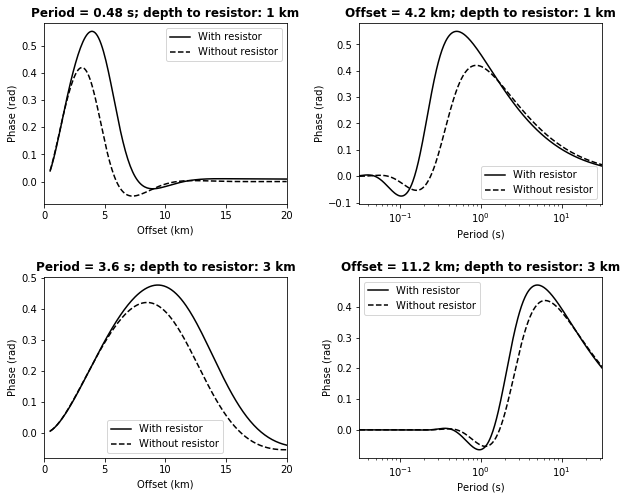

In [9]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.4)

# 1st subplot
plt.subplot(221)
plt.title('Period = '+str(np.round(p[np1], 2))+' s; depth to resistor: 1 km',
          fontweight='bold')
plt.plot(x/1000, -np.angle(ex1km[np1, :]), 'k-', label='With resistor')
plt.plot(x/1000, -np.angle(hs[np1, :]), 'k--', label='Without resistor')
set_axis(2)

# 2nd subplot
plt.subplot(223)
plt.title('Period = '+str(np.round(p[np3], 1))+' s; depth to resistor: 3 km',
          fontweight='bold')
plt.plot(x/1000, -np.angle(ex3km[np3, :]), 'k-', label='With resistor')
plt.plot(x/1000, -np.angle(hs[np3, :]), 'k--', label='Without resistor')
set_axis(2)

# 3rd subplot
plt.subplot(222)
plt.title('Offset = '+str(np.round(x[nx1])/1000) +
          ' km; depth to resistor: 1 km', fontweight='bold')
plt.semilogx(p, -np.angle(ex1km[:, nx1]), 'k-', label='With resistor')
plt.semilogx(p, -np.angle(hs[:, nx1]), 'k--', label='Without resistor')
set_axis(2, p)

# 4th subplot
plt.subplot(224)
plt.title('Offset = '+str(np.round(x[nx3])/1000) +
          ' km; depth to resistor: 3 km', fontweight='bold')
plt.semilogx(p, -np.angle(ex3km[:, nx3]), 'k-', label='With resistor')
plt.semilogx(p, -np.angle(hs[:, nx3]), 'k--', label='Without resistor')
set_axis(2, p)

plt.show()

Figure 5.45 Electric field phases for the land model with (solid lines) and without (dashed lines) a buried resistive layer at 1 km depth (top) and at 3 km depth (bottom) as a function of offset (left) and source oscillation period (right).

In [10]:
epm.Report()

--------------------------------------------------------------------------------
  Date: Tue Jul 13 17:07:01 2021 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GiB
       Environment : Jupyter

  Python 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27)
  [GCC 9.3.0]

             numpy : 1.20.2
             scipy : 1.7.0
             numba : 0.53.0
           empymod : 2.1.2
           IPython : 7.23.1
        matplotlib : 3.4.2

  Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------